In [ ]:
%matplotlib widget
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps
from mpl_toolkits import mplot3d


# Convexité par déplacement

Soit $n \geq 1$, soit $\mu$ une mesure de probabilité sur $\mathbb{R}^n$ (muni de la tribu de Lebesgue), et soit $T$ une application mesurable de $\mathbb{R}^n$ dans $\mathbb{R}^n$. On note $T \# \mu$ la mesure image de $\mu$ par $T$. Si $T \# \mu = \nu$, on dit que "T transporte $\mu$ sur $\nu$".


**T1/**  
Notons $\nu$ la mesure image de $\mu$ par T .  
Par définition de la mesure image on a :   
$\forall f \quad \nu-intégrable  : $ 
$$
\begin{align*}
\int_{\mathbb{R}} f \, d\nu = \int_{\mathbb{R}} (f \circ T) \, d\mu 
&=  \int_{\mathbb{R}} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx \\
&=  \int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx + \int_{\mathbb{R}^-} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx\\
&\stackrel{Parité}{=}2\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx \\
&\stackrel{Chgt.var}{=}\int_{\mathbb{R}^+} f(x) \cdot \frac{1}{\sqrt{2\pi x}} \exp(\frac{-x}{2}) dx
\end{align*}
$$

  
Ainsi : $\nu$ est la loi de densité $x \mapsto \frac{1}{\sqrt{2\pi x}} \cdot \exp(\frac{-x}{2}) \mathbf{1}_{\mathbb{R}^+}(x)$    



**S1/**  

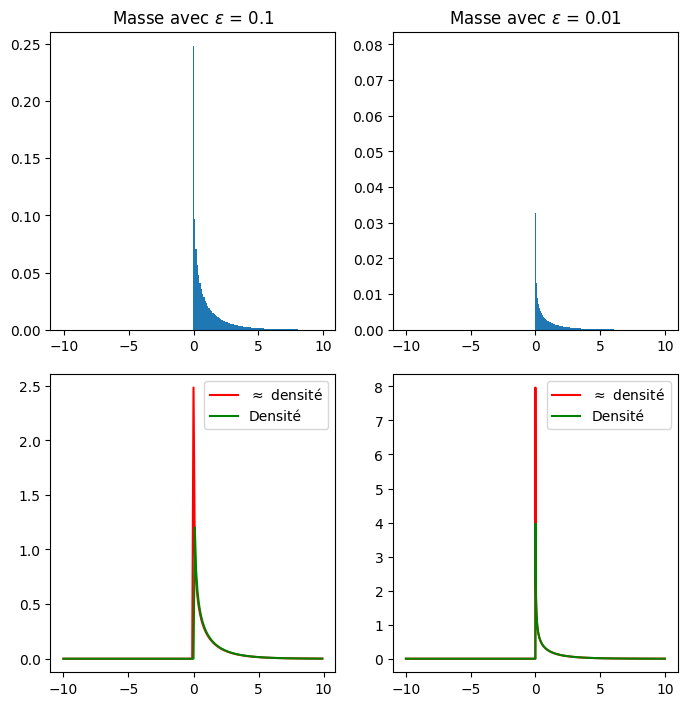

In [139]:
fig,ax=plt.subplots(2,2,figsize=(7,7))
fig.tight_layout()
eps1=0.1
eps2=0.01
seg1=np.arange(-10,10,eps1)
seg2=np.arange(-10,10,eps2)
# Calcul de masse
def mass(a,eps):
    b = a+eps
    if(b<0):
        return 0
    if(a<0):
        a=0
    a=np.sqrt(a)
    b=np.sqrt(b)
    # On multiplie par 2 car il y a deux intervales de même masse
    return 2*(sps.norm.cdf(b)-sps.norm.cdf(a))  
res1 = np.array([mass(i,eps1) for i in seg1])
res2 = np.array([mass(i,eps2) for i in seg2])

dens1 = [i/eps1 for i in res1]
dens2 = [i/eps2 for i in res2]

def funcTheorique(x):
    if(x<=0):
        return 0
    return 1/np.sqrt(2*np.pi*x)*np.exp(-x/2)

theo1 = [funcTheorique(i) for i in seg1]
theo2 = [funcTheorique(i) for i in seg2]
#ax1=plt.subplot(11)
#ax2=plt.subplot(12)
ax[0,0].bar(seg1,res1,width=eps1)
ax[0,0].title.set_text("Masse avec $\epsilon$ = 0.1")
ax[1,0].plot(seg1,dens1,color='red',label=r"$\approx$ densité")
ax[1,0].plot(seg1,theo1,color='green',label=r"Densité")
#plt.ylim([0,0.03])
ax[0,1].bar(seg2,res2,width=eps2)
ax[0,1].title.set_text("Masse avec $\epsilon$ = 0.01")
ax[1,1].plot(seg2,dens2,color='red',label=r"$\approx$ densité")
ax[1,1].plot(seg2,theo2,color='green',label=r"Densité")

ax[1,0].legend(loc="best")
ax[1,1].legend(loc="best")
  

### Interpolation par déplacement

Soit $\nu$ une autre mesure. Supposons que $T$ transporte $\mu$ sur $\nu$. Pour tout $t \in [0, 1]$, on définit l'application $T_t$ par $T_t(x) := (1 - t)x + tT(x)$ et la mesure $\mu_t$ comme l'image de $\mu$ par $T_t$. La famille $(\mu_t)_t$ réalise une interpolation entre $\mu$ et $\nu$ le long du transport $T$, on parle d'interpolation par déplacement.


**T2/**  

Posons $T(x):= x+1$  
Pour $A$ mesurable on a :
$$
\begin{align*}
\nu(A) &= \delta_0(T^{-1}(A)) \\
&= \begin{cases}
1 & \text{si } 1 \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_1(A)
\end{align*}
$$
Ainsi , $$\nu = \delta_1$$  
L'interpolation par déplacement donne :
$\forall t \in [0,1] \quad \mu_t = T_t \# \mu $  
Donc pour $A$ mesurable on a :
$$
\begin{align*}
\mu_t(A) &= \delta_0(A - t) &\text{car} && T^{-1}(x):=x -t \\
&= \begin{cases}
1 & \text{si } t \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_t(A)
\end{align*}
$$  

On remarque que $\tilde{\mu}_t$ est une combinaison convexe de $\delta_0$ et $\delta_1$ alors que $\mu_t$ = $\delta_t$.  
Une illustration pour t=0.2 :



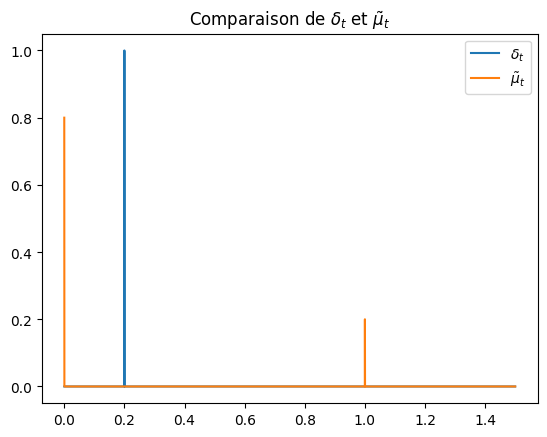

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def dirac(t, x):
    return 1 if x == t else 0

def mutilde(t, x):
    if x==0 : return 1-t 
    if x==1 : return t
    return 0



t = 0.2

x_values = np.arange(0,1.5,t/1000)


y_dirac = [dirac(t, x) for x in x_values]


y_custom = [mutilde(t, x) for x in x_values]


plt.plot(x_values, y_dirac, label='$\delta_t$')
plt.plot(x_values, y_custom, label=r'$\tilde{\mu}_t$')



plt.title(r'Comparaison de $\delta_t$ et $\tilde{\mu}_t$')


plt.legend()


plt.show()


**S2/**   

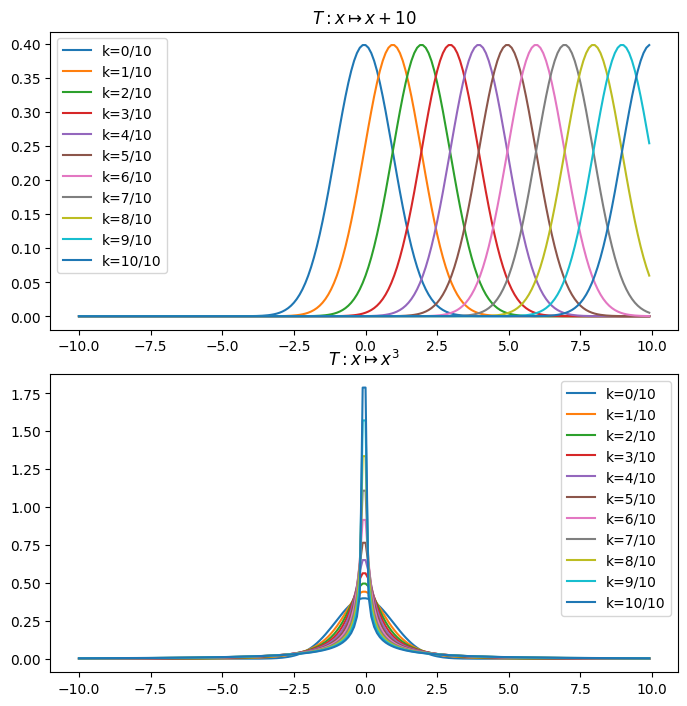

In [141]:
eps=0.1

seg = np.arange(-10,10,eps)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,7))
fig.tight_layout()

def fonctionInverse1T(t,x):
    return x-10*t
def fonctionInverse2T(t,x):
    if t==0:
        return x
    a=t
    c=1-t
    d=-x
    first = rac3(-d/(2*a)+np.sqrt((-d/(2*a))**2+(c/(3*a))**3))
    second = rac3(-d/(2*a)-np.sqrt((-d/(2*a))**2+(c/(3*a))**3))
    return first + second
def rac3(x):
    if(x<0):
        return -(-x)**(1/3)
    return x**(1/3)

def mass(a,b,inv):
    a = inv(a)
    b = inv(b)
    return (sps.norm.cdf(b)-sps.norm.cdf(a)) 

def Tt(x,t,T):
    return (1-t)*x+t*T(x)

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:fonctionInverse1T(k/10,x))/eps for i in seg]
    ax1.plot(seg,res,label="k="+str(k)+"/10")
ax1.title.set_text("$T : x \mapsto x+10$")

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:fonctionInverse2T(k/10,x))/eps for i in seg]
    ax2.plot(seg,res,label="k="+str(k)+"/10")
ax2.title.set_text("$T : x \mapsto x^3$")
ax1.legend()
ax2.legend()
plt.show()



### Transport optimal

Soit $\mu, \nu$ deux mesures sur $\mathbb{R}^n$. On appelle "application de transport de $\mu$ vers $\nu$" toute application mesurable $T$ telle que $T \# \mu = \nu$. À une application de transport $T$, on associe le coût (quadratique)
$$ C_2(T) := \left( \int |x - T(x)|^2 \, d\mu(x) \right)^{1/2} $$
On dit que $T$ est le transport optimal s'il minimise le coût parmi toutes les applications de transport de $\mu$ vers $\nu$.



**T3/**  

Soit T une fonction de transport de $\mu$ vers $\nu $ $\\$
On suppose dans cette question que $x\mapsto x.T(x)$  et  $x\mapsto x^2$ sont intégrables par la mesure $\mu$
$\newline$
Ainsi on obtient : 
$$ 
\begin{align*}
C_2(T)^2 &= \int \lvert x-T(x) \rvert^2 d\mu (x) \\
&= \int x^2d\mu (x) + \int T(x)^2 d\mu (x) - \int 2T(x).x.d\mu(x)
\end{align*}
$$
Or d'après la formule du changement de variable, et en posant $g:x\mapsto x^2$ qui est mesurable, $$ $$
On obtient : $ \int T(x)^2 d\mu(x) = \int g\circ T(x)d\mu(x) = \int g(x)d\nu(x) = \int x^2d\nu(x) = cste $ $$ $$
Et : $\int x^2 d\mu(x) = cste $ $$ $$
On obtient : 
$$
C_2(T)^2 = cste - 2.\int x.T(x)d\mu(x)
$$
Finalement : 
$$
\text{Minimiser }C_2(T) \Leftrightarrow \left( \text{Maximiser} \int x.T(x)d\mu(x) \right)
$$

### Cas de la dimension 1 
**T4/**  
On établit in lemme qui nous sera pratique pour répondre à la question. 

#### Lemme : Inégalité de réordonnement  
Soient $(a_1, \ldots, a_n)$ et $(b_1, \ldots, b_n)$ $(n \in \mathbb{N}, n \geq 2)$ des réels tels que $a_1 \leq \ldots \leq a_n$ et $b_1 \leq \ldots \leq b_n$. Alors,

$$\forall \sigma \in S_n, \quad \sum_{i=1}^{n} a_i b_{\sigma(i)} \leq \sum_{i=1}^{n} a_i b_i
$$

***Preuve:***  

Montrons d’abord le cas $n = 2$.  
Soient $(a_1, a_2) \in \mathbb{R}^2$ et $(b_1, b_2) \in \mathbb{R}^2$, avec $a_1 \leq a_2$ et $b_1 \leq b_2$. Alors,
$(a_2 - a_1)(b_2 - b_1) \geq 0 \Leftrightarrow a_2b_2 - a_1b_2 - a_2b_1 + a_1b_1 \geq 0 \Leftrightarrow a_1b_1 + a_2b_2 \geq a_1b_2 + a_2b_1$   


Hérédité:  
Soit $n \in \mathbb{N}$ tel que $n \ge 3 $. Supposons la proposition vraie pour $n-1$.

Considérons maintenant $x_1 \le \cdots \le x_n$ et $y_1 \le \cdots \le y_n$. Prenons une permutation $\sigma \in S_n$ . 
Il y a deux cas :

* Si $\sigma(n)=n$, alors $y_n=y_{\sigma(n)}$ et, en utilisant l'hypothèse de récurrence, l'inégalité est vérifiée.  
* Si $j := \sigma(n) < n$, alors il existe un $j\in\{1,\dots,n-1\}$ tel que $\sigma(k)=n$. 
  $$a_1b_{\sigma(1)} + \ldots + a_kb_n + \ldots + a_{n}b_j \leq a_1b_{\sigma(1)} + \ldots + a_kb_j + \ldots + a_{n}b_{n} \stackrel{Rec}{\leq} \sum_{i=1}^{n}a_ib_i$$ 
  La dérnière inégalité obtenue en appliquant l'hypothèse de récurrence sur $x_1 \le \cdots \le x_{n-1}$ et $y_1 \le \cdots \le y_{n-1}$ et la sous permutation sur ${1,\ldots,n-1}$ de  
$\tau(i)=\begin{cases}\sigma(i)&\text{pour }i \in \{1,\ldots,n\}\setminus\{k,n\},\\
j&\text{pour }i = k,\\
n&\text{pour }i = n,\end{cases}$ qui provient de $\sigma$ en échangeant les valeurs de $j$ et $n$.   
On obtient ainsi l'inégalité de reordonnement.




**Retour à la question**

Supposons que $\mu$ et $\nu$ s'écrivent sous la forme $\mu = \frac{1}{N} \sum_{i=1}^N \delta_{x_i}$ et $\nu = \frac{1}{N} \sum_{i=1}^N \delta_{y_i}$ où les $(x_i)_{i=1,...,N}$ et $(y_i)_{i=1,...,N}$ sont des points (pour simplifier, supposons-les distincts deux à deux et ordonnés de manière croissante) sur la droite réelle.


Si $K:\{x_1,\ldots,x_N\} \mapsto \{y_{\sigma(1)}, \ldots , y_{\sigma(N)}\}$ où $\sigma \in S_N $ alors : 
$$ N\int x.K(x) d\mu(x)= \sum_{n=1}^N x_n y_{\sigma(n)} \stackrel{Lemme}{\leq} \sum_{n=1}^N x_n y_n =N\int x.T(x) d\mu(x)$$ 
où $T:\{x_1,\ldots,x_N\} \mapsto \{y_1, \ldots , y_N\}$ transport monotone.  
Ainsi , T est le transport optimal.

**S3/**

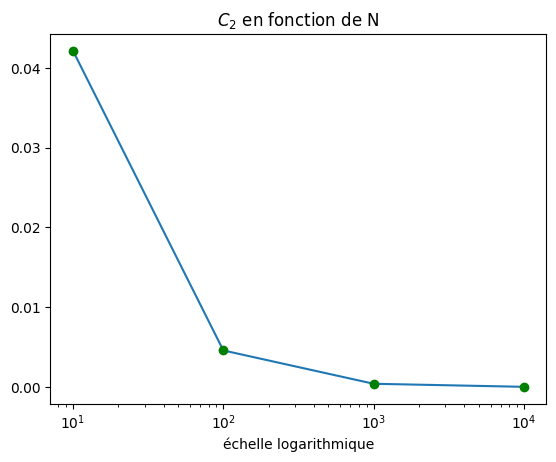

In [142]:

def coutopt(N):
    x = np.array(npr.rand(N))
    y = np.array(npr.rand(N))
    x = np.sort(x)
    y = np.sort(y)
    return np.sqrt(((x - y) ** 2) / N)

m1 = np.mean(np.array([coutopt(10) for _ in range(100)]))
m2 = np.mean(np.array([coutopt(100) for _ in range(100)]))
m3 = np.mean(np.array([coutopt(1000) for _ in range(100)]))
m4 = np.mean(np.array([coutopt(10000) for _ in range(100)]))

plt.plot([10, 100, 1000, 10000], [m1, m2, m3, m4])
plt.plot([10, 100, 1000, 10000], [m1, m2, m3, m4],'go')
plt.xscale('log')
plt.xlabel("échelle logarithmique")
plt.title("$C_2$ en fonction de N")
plt.show()


Le cout décroit rapidement entre 10 et 100.
La vitesse de convergence vers 0 est géométrique.


**T5/**  

On prend maintenant pour $\mu$ la mesure uniforme sur $[0, 1]$ et pour $\nu$ une mesure de la forme $\sum_{i=1}^N p_i \delta_{y_i}$, où les coefficients $p_i$ sont positifs et tels que $\sum_{i=1}^N p_i = 1$.




Il suffit de prendre les $(y_i)_i$ distincts deux à deux.
(Si $y_i=y_j$, on prend $y'_i=y_i+y_j$ et $p'_i$ =$p_i + p_j$)
$ \newline $
On ordonne la suite $ ( y_i ) _{i\in [0,n]}$ avec la permutation $ \sigma \text{.} $ 
On obtient la suite $ ( y_{\sigma(i)} ) _{i\in [0,n]} $ $ \newline $
et on pose $\forall k \in [0,n] \quad  x_k:= \sum_{i=0}^{k} p_{\sigma(i)} \quad \left( x_i \in [0,1] \right) $ 
$ \newline $
on définit la fonction de transport : 
$$
\forall k \in [0,n-1] \quad \forall x \in [x_i,x_{i+1}[ \quad T(x)=y_{\sigma(i)}
$$
Donc pour $\nu = T \# \mu $ : 

$$
\begin{align*}
\forall i \in [1,n] \quad \nu(\{y_i\}) &=\mu\left(T^{-1}(\{y_i\})\right) \\
&=\mu\left( \left[x_{\sigma^{-1}(i)},x_{\sigma^{-1}(i)+1}\right] \right) \\
&=x_{\sigma^{-1}(i)+1}-x_{\sigma^{-1}(i)} \\
&=p_i \\
&=\sum_{k=1}^{n}p_i\delta_{y_i}(\{y_i\})
\end{align*}
$$
et 
$$
\nu(\{x\}) = \nu\left(T^{-1}(\{x\})\right) = \nu(\emptyset) = 0 \quad \text{pour } x \not\in \{y_1,y_2....,y_n\}
$$
Finalement : 
$
\nu = \sum_{k=1}^{n}p_i\delta_{y_i}
$
Donc T transport $\mu$ sur $\nu$
$$ \newline $$
Voici un exemple d'une telle fonction



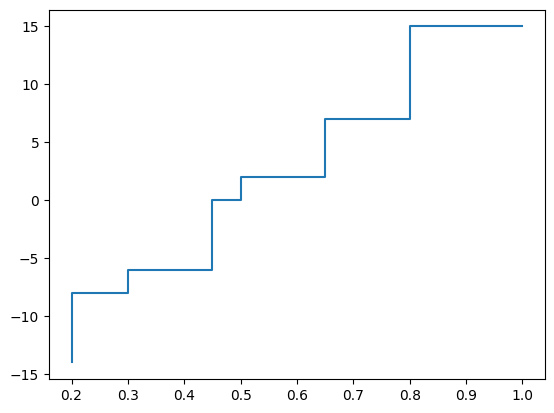

In [143]:
Ysorted = np.array([-14,-8,-6,0,2,7,15])
P = np.array([0.2,0.1,0.15,0.05,0.15,0.15,0.2])
X = np.cumsum(P)
plt.step(X,Ysorted)
plt.show()

**S4/**

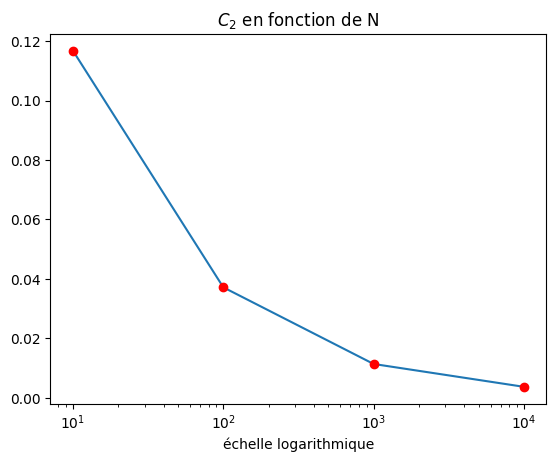

In [150]:

def coutopt2(N):
   
    Y = np.array(npr.rand(N))
    Y = np.sort(Y)     # Transport optimal
    c=np.sum(np.array([((i+1)/N - Y[i])**3 - (i/N - Y[i])**3  for i in range(N)]))/3
    
    return c**0.5

v1 = np.mean(np.array([coutopt2(10) for _ in range(100)]))
v2 = np.mean(np.array([coutopt2(100) for _ in range(100)]))
v3 = np.mean(np.array([coutopt2(1000) for _ in range(100)]))
v4 = np.mean(np.array([coutopt2(10000) for _ in range(100)]))

plt.plot([10, 100, 1000, 10000], [v1, v2, v3, v4])
plt.plot([10, 100, 1000, 10000], [v1, v2, v3, v4],'ro')
plt.xscale('log')
plt.xlabel("échelle logarithmique")
plt.title("$C_2$ en fonction de N")
plt.show()        

### Gaussiennes en dimension 2

Soit $\mu = N(0, I_d)$ la loi normale standard en dimension 2 et $\nu = N(m, \Sigma)$ une autre loi gaussienne de moyenne $m \in \mathbb{R}^2$ et matrice de covariance $\Sigma$. On admettra que le transport optimal est donné par l'application $T : x \mapsto m + \Sigma^{1/2} x$ .


**S5/**

On représente l'interpolation par déplacement $(\mu_t)_{t\in[0,1]}$ entre $N(0, I_d)$ et $N((10, 10), \Sigma = \begin{pmatrix} 1 & 1 \\ 1 & 3 \end{pmatrix})$.



NameError: name 'sps' is not defined

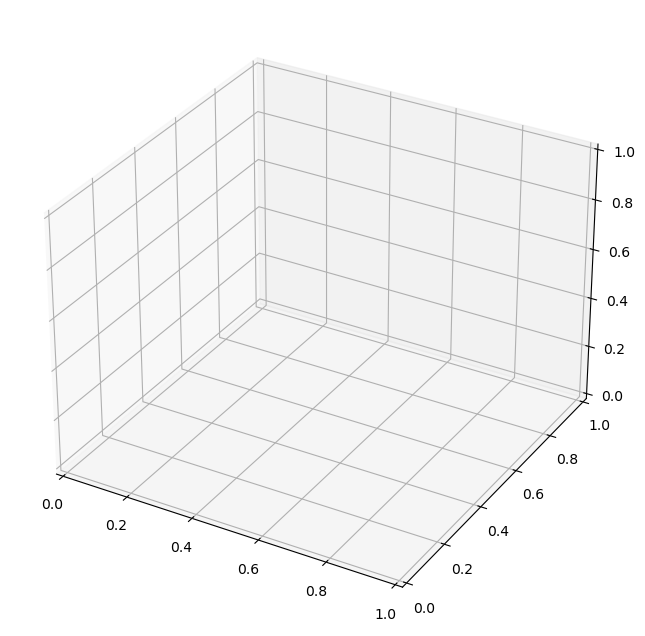

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


def mass(a, b, inv):
    
    #print(a,inv(a))
    a = inv(a)
    b = inv(b)
    

    mean = np.zeros(2)
    covariance = np.eye(2)

    #mv_normal = multivariate_normal(mean=mean, cov=covariance)
    #probability = mv_normal.cdf(b) - mv_normal.cdf(a)
    proba1 = sps.norm.cdf(a[0])-sps.norm.cdf(b[0])
    if(a[0]<b[0]): proba1 *= -1
    proba2 = sps.norm.cdf(b[1])-sps.norm.cdf(a[1])
    if(a[1]>b[1]): proba2 *= -1
        
    #print(a,b,proba1,proba2)

    return proba1*proba2


def racine_matrice(m):
    eigenvalues, eigenvectors = np.linalg.eigh(m)
    eigenvalues = np.where(eigenvalues > 0, eigenvalues, 0)
    sqrt_eigenvalues = np.sqrt(eigenvalues)
    sqrtmat = eigenvectors @ np.diag(sqrt_eigenvalues) @ eigenvectors.T
    return sqrtmat


def Tinv(t, x, m, cr):
    a = np.linalg.inv((1 - t) * np.eye(2) + t*cr)
    return np.dot(a, x - t * m)


m = np.array([10, 10])
c = np.array([[1, 1], [1, 3]])

cr = racine_matrice(c)
#print(cr)

eps = 0.4

#print(Tinv(0,np.array([1,10]),m,c))

x = np.arange(-2, 12 + eps, eps)
y = np.arange(2, 12 + eps, eps)
seg = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

for k in range(0, 11):
    res = np.array([mass(np.array([i, j]), np.array([i + eps, j + eps]), lambda x: Tinv(k / 10, x, m, cr))/eps/eps for i, j in zip(seg[0].ravel(), seg[1].ravel())])
    res = res.reshape(seg[0].shape)
    ax.plot_surface(seg[0], seg[1], res, cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Masse')


plt.title(r"$T : x \mapsto m +\Sigma^{\frac{1}{2}} x $")

plt.show()



### Plan de transport

**T6/** 

Exemple de deux mesures de probabilité $\mu, \nu$ à densité sur $\mathbb{R}$ telles qu'il est impossible de trouver un transport continu $T$ de $\mu$ vers $\nu$  :


Soient $\mu$ une mesure de densité $ d\mu(x) = \mathbf{1}_{[0,1]}(x)dx $ 
et $\nu$ une mesure de densité $  d\nu(x)= \frac{1}{2}\left(\mathbf{1}_{[0,1]}(x)+\mathbf{1}_{[2,3]}(x) \right)dx $ .


Supposons par absurde qu'il existe une fonction de transport de $\mu$ à $\nu$ ***continue***.


On a $T$ est continue donc $T^{-1}([0,1]) = [a,b]\subset[0,1] $ et $T^{-1}([2,3]) = [c,d]\subset[0,1] $


d'où
$$
\begin{align*}
\frac{1}{2} = \nu([0,1]) &= \mu\left( T^{-1}([0,1]) \right) \\
&= \mu([a,b]) \\
&= b-a
\end{align*}
$$
De même
$$
\begin{align*}
\frac{1}{2} = \nu([2,3]) &= \mu\left( T^{-1}([2,3]) \right) \\
&= d-c
\end{align*}
$$

Donc forcément $[a,b]=\left[0,\frac{1}{2}\right]$ et $[c,d]=\left[\frac{1}{2},1\right]$ ou l'inverse.

On se place dans le cas évoqué $ \left( \text{rôles symétrique de }(a,b)\text{ et }(c,d)  \right) $.
On obtient donc : $ T(b)\leq 1 $ et $ T(b)=T(c)\geq 2 $


Absurde ! Donc il n'existe pas de fonction de transport entre $\mu$ et $\nu$ qui soit ***continue***.

********
### Régularisation entropique, algorithme du Sinkhorn

Pour des raisons pratiques, il arrive qu'on cherche plutôt à minimiser la quantité suivante parmi tous les plans de transport :
$$ F(P) := \sum_{i,j} |x_i - y_j|^2 P_{ij} + \varepsilon \sum_{i,j} P_{ij} \log P_{ij} $$
Le second terme correspond à l'entropie de $P$

**T7/**



 On pose $f:x\mapsto x.log(x)$ et on suppose $\epsilon > 0$ 

On a donc $F_{\epsilon}(P) = \sum_{i,j}\left\vert x_i-y_j \right\vert^2P_{ij}+\epsilon \sum_{i,j}f(P_{ij}) $

On a $f$ dérivable sur $ \mathbb{R}^{*+} $ et $f'(x) = log(x) + 1$ et donc $f''(x)=\frac{1}{x}>0 $, donc f est strictement convexe.

Soit $P$ et $P'$ deux plans de transport , $\lambda \in ]0,1[ $ :
$$ 
\begin{align*}
F_{\epsilon}(\lambda P+(1-\lambda)P') &= \sum_{i,j}\left\vert x_i-y_j \right\vert^2
\left(\lambda P_{ij}+(1-\lambda)P'_{ij}\right)+
\epsilon \sum_{i,j}f\left(\lambda P_{ij}+(1-\lambda)P'_{ij}\right) \\
(f \text{ str convexe}) & \leq \sum_{i,j}\left\vert x_i-y_j \right\vert^2\lambda.P_{ij}+\epsilon \sum_{i,j}\lambda.f(P_{ij})
+\sum_{i,j}\left\vert x_i-y_j \right\vert^2(1-\lambda)P'_{ij}+\epsilon \sum_{i,j}(1-\lambda).f(P'_{ij}) \\ 
&\leq \lambda F_{\epsilon}(P_{i,j})+(1-\lambda)F_{\epsilon}(P'_{i,j})
\end{align*}
$$
D'où $\forall \epsilon>0 \quad F_\epsilon $ est convexe.


**T7 bis/**    



Si $F_\epsilon$ possède au moins 2 minimiseurs qu'on note $R$ et $Q$ alors : 
$$ F_{\epsilon}(\frac{1}{2} (R+Q)) \lt \frac{1}{2} (F_{\epsilon}(R) + F_{\epsilon}(Q)) = \min\limits_{\substack{P}} F_{\epsilon}(P)
$$
où P parcours l’espace des plans de transport entre $\mu$ à $\nu$ .  
Ainsi , si $F_\epsilon$ possède un minimiseur alors celui-ci est unique.

**S6/**

In [ ]:
def K(eps, X, Y):
    N = len(X)
    M = len(Y)
    K = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            K[i, j] = np.exp(-np.linalg.norm(X[i] - Y[j])**2 / eps)
    return K

def calc_w(X, Y):
    N = len(X)
    M = len(Y)
    w = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            w[i, j] = np.linalg.norm(X[i] - Y[j])**2
    return w

def F(eps, P, X, Y):
    w = calc_w(X, Y)
    f = np.sum(P * w) + eps * np.sum(P * np.log(P))
    return f

def sinkhorn(eps, a, b, X, Y, limit):
    N = len(X)
    M = len(Y)
    u = np.ones(N)
    v = np.ones(M)
    k = K(eps, X, Y)
    flag = True
    delta = 1
    while delta > limit:
        prevresult = result if flag == False else np.inf

        u = a / (k @ v)
        v = b / (k.T @ u)

        P = np.diag(u) @ k @ np.diag(v)

        result = F(eps, P, X, Y)

        flag = False
        delta = np.abs(result / prevresult - 1)

    return result

def sim(n, m, eps, dim):
    X = np.random.rand(n, dim)
    Y = np.random.rand(m, dim)
    a = np.random.rand(n)
    b = np.random.rand(m)

    return sinkhorn(eps, a, b, X, Y, 0.01)

print(rf'En dimension 1, N=100, ε = 0.5 -> min ≈ {sim(100, 200, 0.5, 1)}')
print(rf'En dimension 2, N=100, ε = 0.5 -> min ≈ {sim(100, 200, 0.5, 2)}')
print(rf'En dimension 2, N=100, ε = 0.1 -> min ≈ {sim(100, 200, 0.1, 2)}')


En dimension 1, N=100, ε = 0.5 -> min ≈ -217.1739276825425
En dimension 2, N=100, ε = 0.5 -> min ≈ -218.7212363524901
En dimension 2, N=100, ε = 0.1 -> min ≈ -34.778060817618965


### Convexité par déplacement

Soit $ \mu, \nu $ deux mesures de probabilité possédant une densité continue et strictement positive sur $ [0, 1] $. Soit $ T $ un transport de $ \mu $ vers $ \nu $ et soit $ \{\mu_t\}_{t\in[0,1]} $ l'interpolation associée. Soit $ f_t $ la densité de $ \mu_t $.


**T8/**


Premièrement , remarquons que pour $\lambda$ , $t , s$ $\in [0,1]$ :
$$T_{\lambda t + (1-\lambda) s} = (1-\lambda t + (1-\lambda) s) x + (\lambda t + (1-\lambda) s) T(x) = \lambda T_t+ (1-\lambda) T_s$$
Ainsi ,
\begin{align*}
\int V(x) \, d\mu_{\lambda t + (1-\lambda) s}(x) &= \int V(T_{\lambda t + (1-\lambda) s}(x)) \, d\mu(x) \\ 
&= \int V(\lambda T_t(x)+ (1-\lambda) T_s(x)) \, d\mu(x)\\
&\stackrel{V convexe }{\leq} \lambda \int V( T_t(x)) \, d\mu(x) +(1-\lambda) \int V(T_s(x)) \, d\mu(x) \\
&=  \lambda \int V( x) \, d\mu_t(x) +(1-\lambda) \int V(x) \, d\mu_s(x) 
\end{align*}
Donc $t \mapsto \int V(x) \, d\mu_t(x)$ est convexe sur $[0,1]$ .  
Et,
\begin{align*}
\int\int W(x-y) \, d\mu_{\lambda t + (1-\lambda) s}(x) d\mu_{\lambda t + (1-\lambda) s}(y) &= \int\int W(T_{\lambda t + (1-\lambda) s}(x)-T_{\lambda t + (1-\lambda) s}(y)) \, d\mu(x) \, d\mu(y)  \quad \text{en inversant l'ordre des intégrales et par definition}\\ 
&=\int\int W(\lambda T_t(x)+ (1-\lambda) T_s(x)-\lambda T_t(y)- (1-\lambda) T_s(y)) \, d\mu(x) \, d\mu(y)   \\
&=\int\int W(\lambda (T_t(x)-T_t(y)) + (1-\lambda) (T_s(x)- T_s(y))) \, d\mu(x) \, d\mu(y)   \\
&\stackrel{W convexe }{\leq} \lambda \int\int W(T_t(x)-T_t(y)) \, d\mu(x) d\mu(y) +(1-\lambda) \int\int W(T_s(x)-T_s(y)) \, d\mu(x) d\mu(y) \\
&=  \lambda \int\int W(x-y) \, d\mu_t(x) d\mu_t(y) +(1-\lambda) \int\int W(x-y) \, d\mu_s(x) d\mu_s(y) 
\end{align*}
Donc $t \mapsto \int\int W(x-y) \, d\mu_t(x) d\mu_t(y)$ est convexe sur $[0,1]$ .

**S8/**

Pour $a , b$ $ \in \mathbb{R}^n $ , $t \in [0,1]$
$$\lVert a - ((1-t) a + t b) \rVert^2 =t^2 \lVert a - b \rVert^2$$
Or $t \mapsto t^2 $ est convexe.
Donc   $t \mapsto \lVert a - ((1-t) a + t b) \rVert^2 $ est convexe .